In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
# Let us create three datasets. The first is a toy one, the second consists
# of blobs of points, and the second consists of concentric circles.

blob = lambda x, y, stddev, n_samples: list(zip(
    np.random.normal(x, stddev, n_samples),
    np.random.normal(y, stddev, n_samples)
))

circle = lambda x, y, stddev, radius, n_samples: [
    (
        x + radius * math.cos(2 * math.pi * i / n_samples) + np.random.normal(0, stddev),
        y + radius * math.sin(2 * math.pi * i / n_samples) + np.random.normal(0, stddev)
    )
    for i in range(n_samples)
]

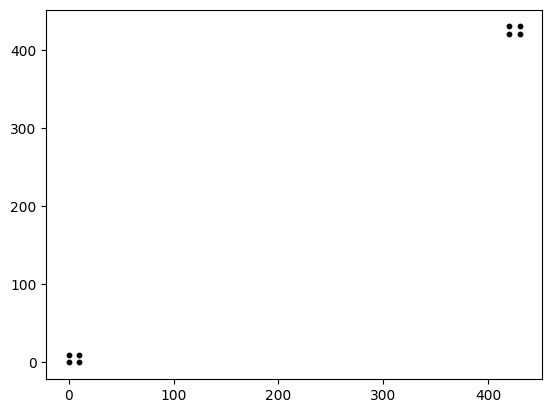

In [3]:
birthday_dataset = [(0, 0), (0, 10), (10, 0), (10, 10), (420, 420), (420, 430), (430, 420), (430, 430)]
plt.scatter(*zip(*birthday_dataset), s=10, color='black')
plt.show()

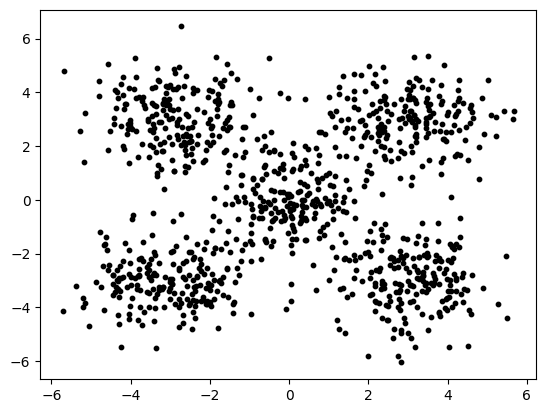

In [4]:
blobs_dataset = sum((blob(x, y, 1, 200) for x, y in [(0, 0), (3, 3), (-3, 3), (-3, -3), (3, -3)]), start=[])
plt.scatter(*zip(*blobs_dataset), s=10, color='black')
plt.show()

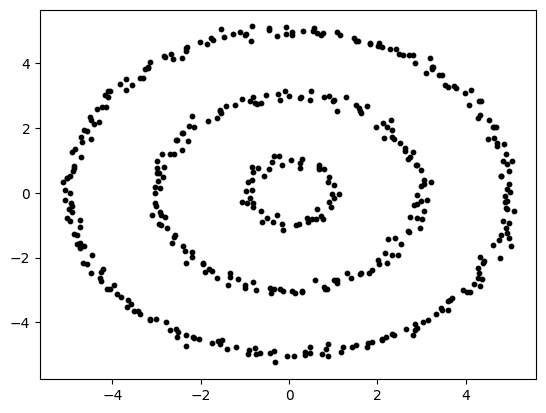

In [5]:
circles_dataset = sum((circle(0, 0, 0.1, radius, radius * 50) for radius in [1, 3, 5]), start=[])
plt.scatter(*zip(*circles_dataset), s=10, color='black')
plt.show()

In [6]:
def display_clusters(clusters):
    # get len(clusters) spaced out colors
    colors = plt.get_cmap('Accent')(np.linspace(0, 1, len(clusters)))
    for (cluster_center, cluster), color in zip(clusters.items(), colors):
        # plot the cluster center using a big marker
        plt.scatter(*cluster_center, s=1000, color=color, alpha=0.2)
        # plot the cluster points using small markers
        plt.scatter(*zip(*cluster), s=10, color=color)
    plt.show()

def compute_clusters(X, cluster_centers):
    '''
    Given fixed cluster centers, computes the clusters of each cluster center c
    with respect to X, i.e. the set of points whose nearest cluster center is c.
    
    Returns:
        clusters (dict): the clusters as sets of points (tuples of floats),
            keyed by their cluster center
    '''
    X, cluster_centers = np.array(X), np.array(cluster_centers)
    # a (len(self.X), d) shape array consisting of the nearest cluster
    # center to each point in self.X
    nearest_cluster_centers = cluster_centers[np.argmin(
        np.linalg.norm(
            X - np.repeat(cluster_centers[:, np.newaxis, :], len(X), axis=1),
            axis=2
        ),
        axis=0
    )]
    clusters = defaultdict(set)
    for point, nearest_cluster_center in zip(X, nearest_cluster_centers):
        clusters[tuple(nearest_cluster_center)].add(tuple(point))
    return dict(clusters)

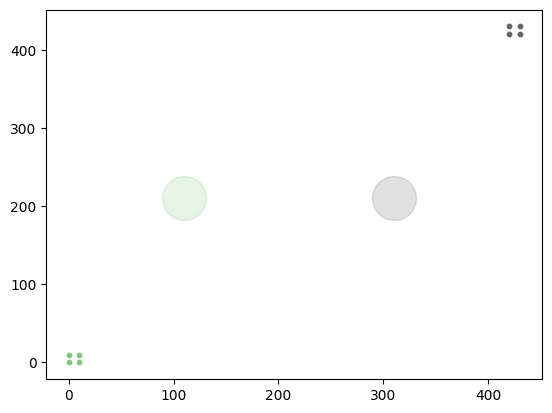

In [7]:
# The bottom-left points should be green, and the top-right points should be gray
display_clusters(compute_clusters(birthday_dataset, [(110, 210), (310, 210)]))

In [8]:
# Here are some tests for `compute_clusters`
assert compute_clusters(birthday_dataset, [(5, 5), (425, 425)]) == {
    (5, 5): {(0, 0), (0, 10), (10, 0), (10, 10)},
    (425, 425): {(420, 420), (420, 430), (430, 420), (430, 430)}
}
assert compute_clusters(birthday_dataset, [(210, 210)]) == {
    (210, 210): set(birthday_dataset)
}
assert compute_clusters(birthday_dataset, birthday_dataset) == {
    point: {point}
    for point in birthday_dataset
}
assert compute_clusters(birthday_dataset, [(110, 210), (310, 210)]) == {
    (110, 210): {(0, 0), (0, 10), (10, 0), (10, 10)},
    (310, 210): {(420, 420), (420, 430), (430, 420), (430, 430)}
}

In [9]:
class KMeans:
    '''
    Attributes:
        clusters: a length K dict of the cluster sets keyed by their centers
        converged: whether the algorithm converged
    '''
    
    def __init__(self, X, K, max_iter=300):
        '''
        Args:
            X (list of tuples of floats): distinct data points
            K (int): the number of cluster centers
            max_iter (int): the maximum number of interations to perform
        '''
        assert len(set(X)) == len(X)
        assert K >= 0
        
        self.X, self.K, self.max_iter = X, K, max_iter

        # randomly sample K data points to be the initial cluster centers
        self.cluster_centers = random.sample(self.X, k=K)
        X = np.array(X)

        for i in range(max_iter):
            new_cluster_centers = [
                tuple(np.mean(list(cluster), axis=0))
                for cluster in self.clusters.values()
            ]
            # check if the algorithm converged
            if set(self.cluster_centers) == set(new_cluster_centers):
                self.converged = True
                break
            self.cluster_centers = new_cluster_centers
        else:
            # the for-loop did not break, i.e. the algorithm did not converge
            self.converged = False

    @property
    def clusters(self):
        assert hasattr(self, 'X') and hasattr(self, 'cluster_centers')
        return compute_clusters(self.X, self.cluster_centers)
        

In [10]:
# Here are some tests for the KMeans class
kmeans_birthday = KMeans(birthday_dataset, 2)
assert kmeans_birthday.converged
assert kmeans_birthday.clusters == {
    (5, 5): {(0, 0), (0, 10), (10, 0), (10, 10)},
    (425, 425): {(420, 420), (420, 430), (430, 420), (430, 430)}
}

kmeans_one_iteration = KMeans(blobs_dataset, 5, max_iter=1)
assert not kmeans_one_iteration.converged

kmeans_birthday.converged=True


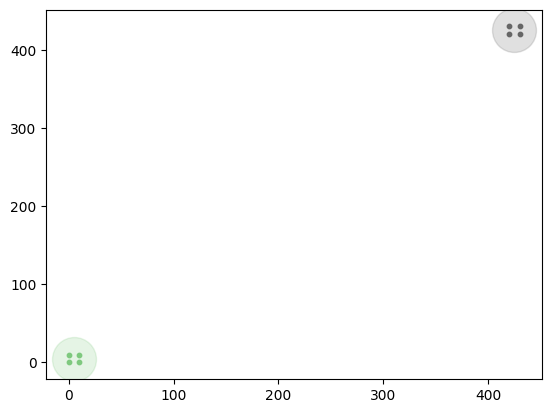

In [11]:
kmeans_birthday = KMeans(birthday_dataset, 2)
print(f'{kmeans_birthday.converged=}')
display_clusters(kmeans_birthday.clusters)

kmeans_blobs.converged=True


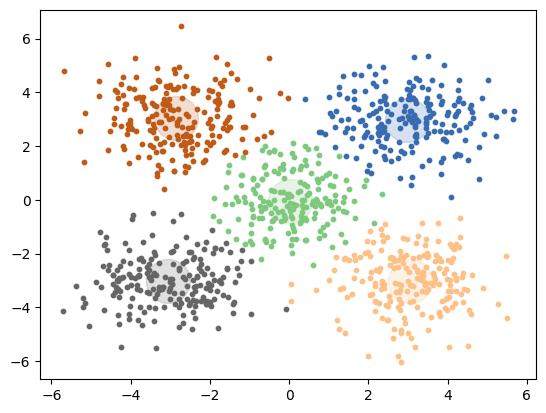

In [12]:
kmeans_blobs = KMeans(blobs_dataset, 5)
print(f'{kmeans_blobs.converged=}')
display_clusters(kmeans_blobs.clusters)

kmeans_circles.converged=True


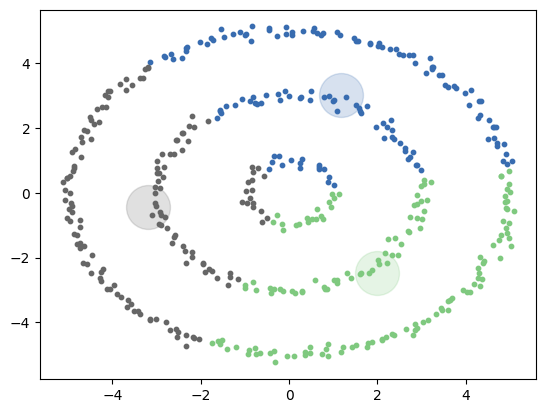

In [13]:
kmeans_circles = KMeans(circles_dataset, 3)
print(f'{kmeans_circles.converged=}')
display_clusters(kmeans_circles.clusters)